# Noise Analysis
This notebook is mainly for debugging purposes.
It should check the simulation results for the following questions

1. Validate if generated red noises ACF conforms to analytical solution
2. Validate if noise 1 and mixed noise have both an intensity of 1 

## Simulate a single ensemble with red noise powered ou processes

In [1]:
import os
print(os.chdir(os.environ['PYTHONPATH']))
print(os.getcwd())
from main_multiple_runs import R, T, t_interval, T_cycles, NoiseType
from plotting.plotting import plot_with_percentiles, plot_fwahh, fwahh
from pathlib import Path
from stats import acf, group_by_index
from file_handling import load_ensemble, load_simulation_result
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

R = 500
ensembles = 1000

res = load_simulation_result(Path(f"../results"), f'red_noise_test_{ensembles}_{R}_0/red noise_0.2_0.3_0.3_0.5_0.5', raw_ensemble_fields=['noise1', 'mixed_noise'])

None
/Users/tts/workspace/oldenburg/praktikum_jan_freund/code/src


## 1. Does the simulated red noises ACF conform to the analytical solution?

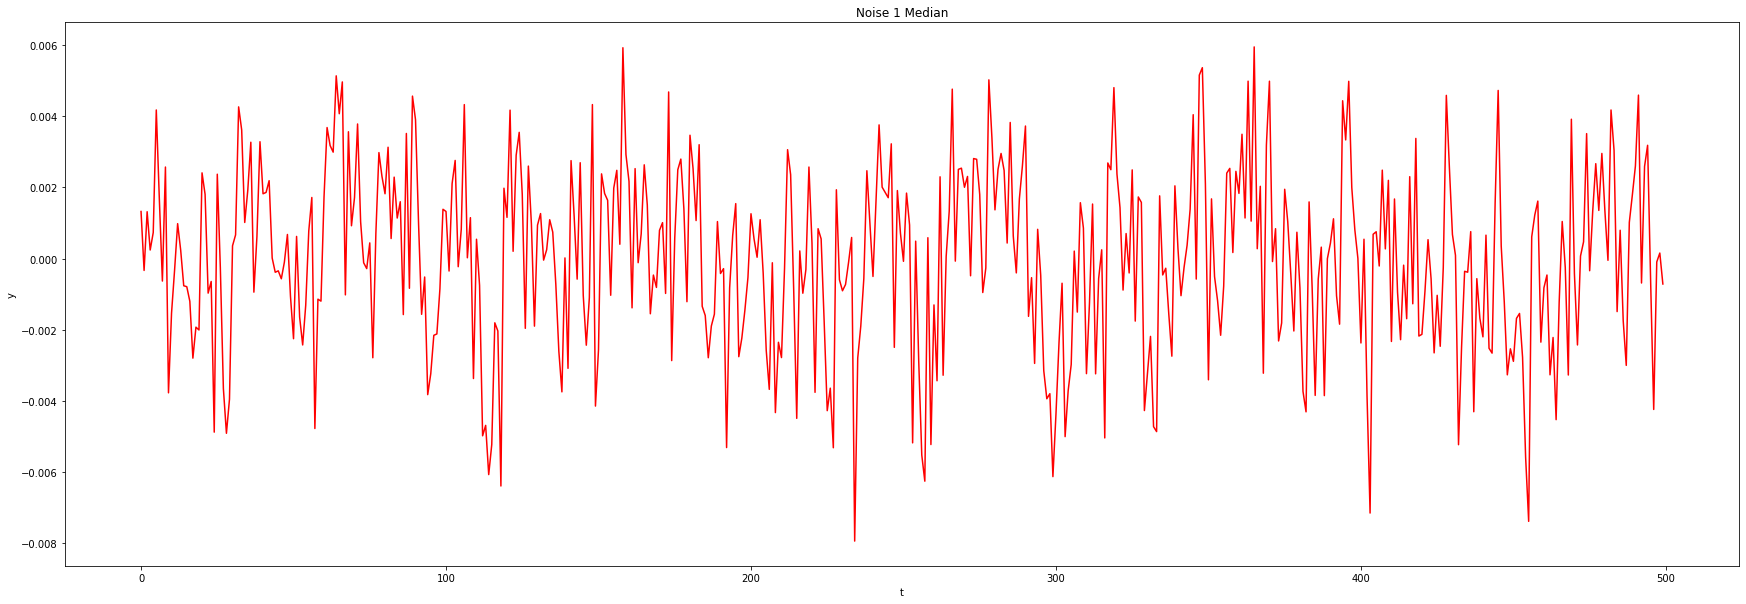

In [2]:
res['ensemble']['noise1_median'].plot(color='r', title='Noise 1 Median', xlabel='t', ylabel='y')

In [3]:
acfs = [acf(res['noise1'][str(i)], R, 0.2) for i in range(0, ensembles)]
acf_median = group_by_index(acfs).median()

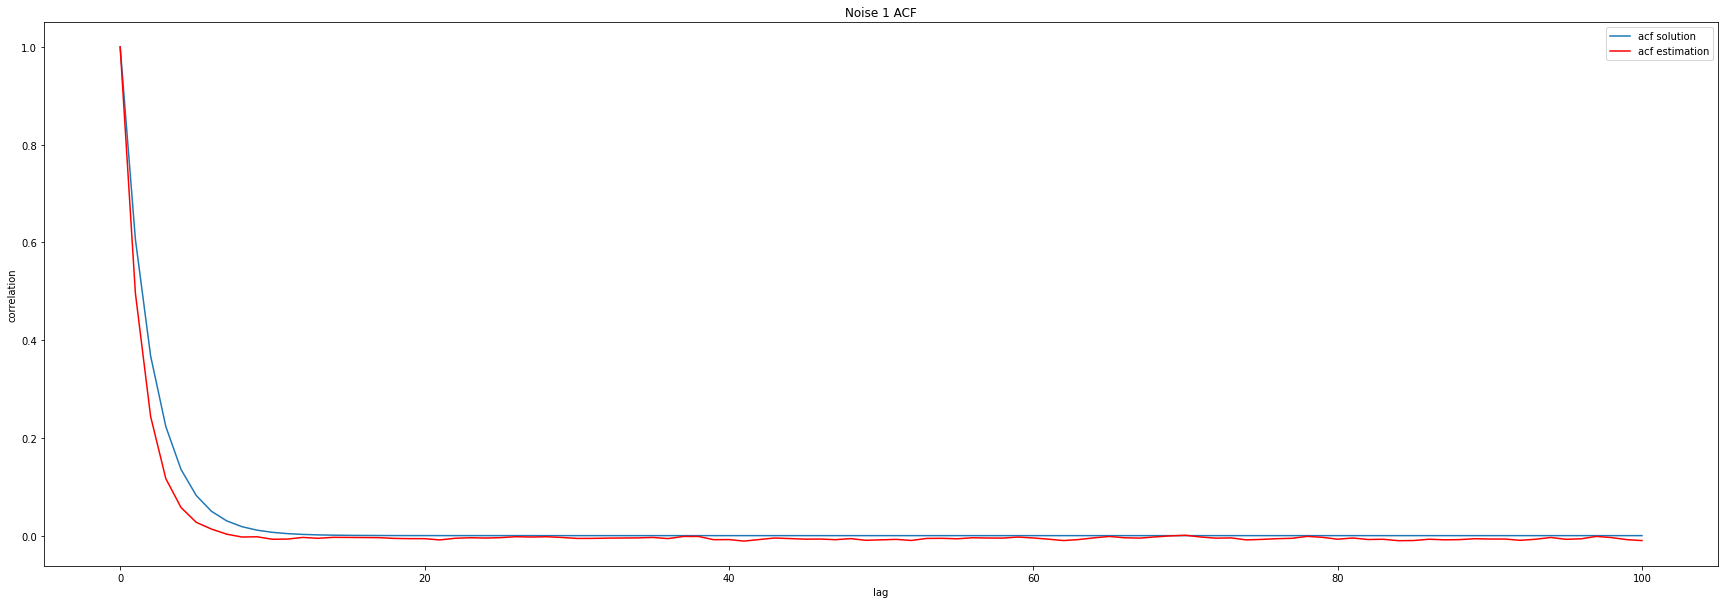

In [4]:
lags = res['acf_ensemble']['acf_ou1_median'].index
an_acf = pd.Series([math.e ** -(0.5 * lag) for lag in lags], index = lags).plot(label='acf solution')
acf_median.plot(title='Noise 1 ACF', ylabel='correlation', xlabel='lag', color='r', label='acf estimation')
plt.legend()

## 2) Is the noise intensity of nosie 1 and mixed noise 1?

In [19]:
res['noise1']['0'].autocorr(lag=7)

-0.015642353353565373

In [21]:
numerical_scaling = 2 / R
noise1_var = pd.Series([res['noise1'][str(i)].var() for i in range(0, ensembles)])
noise1_var_median = noise1_var.median() * 1/ numerical_scaling

noisem_var = pd.Series([res['mixed_noise'][str(i)].var() for i in range(0, ensembles)])
noisem_var_median = noisem_var.median() * 1/ numerical_scaling

print(noise1_var_median, noisem_var_median)

1.0023577568437414 0.9942407534194979
